# Manipulando Embeddings com Ollama 

In [11]:
#!pip install langchain_community
#!pip install matplotlib


In [8]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from langchain_community.embeddings import OllamaEmbeddings

# Define os documentos
documents = [ "Variáveis em Python e os tipos de dados básicos como int, float e string.", 
             "Estruturas de controle em Python: if, else, e elif para tomada de decisões.", 
             "Loops em Python, como for e while, para repetição de tarefas.", 
             "Funções em Python: como definir e chamar funções usando a palavra-chave def."]

# Define o modelo de embeddings
embeddings = OllamaEmbeddings(model="mxbai-embed-large")
document_embeddings = embeddings.embed_documents(documents)

# Realiza uma busca de similaridade para uma consulta dada
query = "Como criar funções em Python?"
query_embedding = embeddings.embed_query(query)

# Calcula os scores de similaridade
similarity_scores = cosine_similarity([query_embedding], document_embeddings)[0]

# Encontra o documento mais similar
most_similar_index = np.argmax(similarity_scores)
most_similar_document = documents[most_similar_index]

print(f"Documento mais similar à consulta '{query}':")
print(most_similar_document)


Documento mais similar à consulta 'Como criar funções em Python?':
Funções em Python: como definir e chamar funções usando a palavra-chave def.


       Palavra                                         Embeddings
0         maçã  [0.32430750131607056, 0.18679279088974, 0.6872...
1       banana  [0.6120967268943787, -0.23743531107902527, 0.0...
2      laranja  [0.4078287184238434, 0.2952304780483246, -0.17...
3          uva  [0.4137634336948395, -0.44416117668151855, 0.4...
4      abacaxi  [0.3178466558456421, 0.35518813133239746, 0.19...
5        carro  [0.4847864508628845, 0.1452716588973999, 0.276...
6    bicicleta  [0.3579205274581909, -0.04298664629459381, 0.3...
7        avião  [0.5892048478126526, -0.028553977608680725, 0....
8         trem  [0.458555668592453, 0.3198055624961853, 0.3208...
9         moto  [0.3299342691898346, -0.5327137112617493, 0.10...
10     futebol  [0.18299651145935059, 0.024010132998228073, 0....
11    basquete  [0.03639274090528488, 0.008655846118927002, -0...
12     natação  [0.3577887713909149, 0.13600321114063263, -0.4...
13       vôlei  [0.11475495994091034, -0.12273511290550232, -0...
14       t

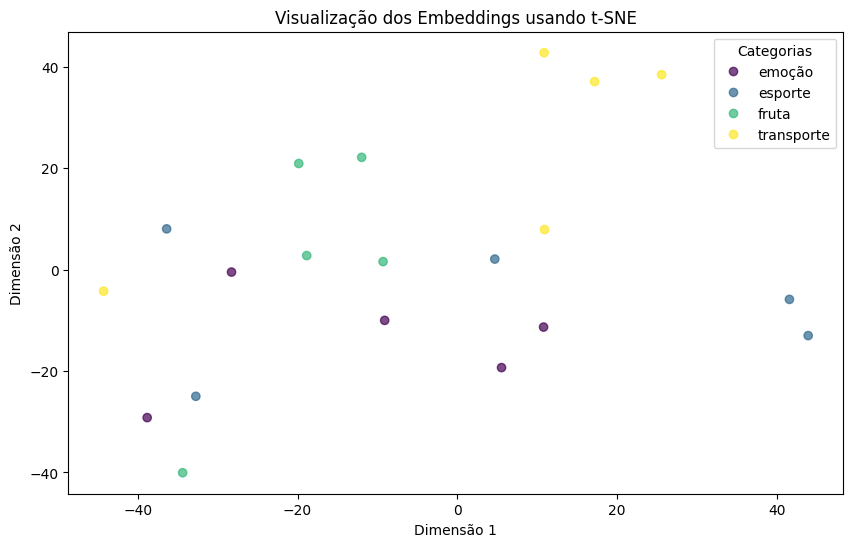

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from langchain_community.embeddings import OllamaEmbeddings

# Cria um DataFrame com palavras e suas categorias
palavras = [
    "maçã", "banana", "laranja", "uva", "abacaxi", "morango", "kiwi", "melancia", "cereja", "manga",
    "pêssego", "ameixa", "pera", "framboesa", "groselha", "abacate", "figo", "limão", "coco", "tangerina",
    "caqui", "caju", "açaí", "graviola", "jabuticaba", "maracujá", "pinha", "carambola", "pitanga", "romã",
    "carro", "bicicleta", "avião", "trem", "moto", "ônibus", "barco", "patinete", "navio", "metrô",
    "caminhão", "helicóptero", "trator", "balão", "espaçonave", "skate", "scooter", "jato", "táxi", "hoverboard",
    "triciclo", "trólebus", "furgão", "carreta", "veleiro", "caiaque", "caminhonete", "quadriciclo", "buggy", "limusine",
    "futebol", "basquete", "natação", "vôlei", "tênis", "corrida", "ciclismo", "golfe", "boxe", "rugby",
    "hóquei", "beisebol", "críquete", "polo", "esgrima", "surf", "judô", "karatê", "badminton", "ginástica",
    "skate", "snowboard", "esqui", "mergulho", "remo", "caminhada", "triatlo", "halterofilismo", "ioga", "pilates",
    "felicidade", "tristeza", "raiva", "amor", "medo", "surpresa", "ansiedade", "esperança", "frustração", "confiança",
    "empatia", "gratidão", "desespero", "nostalgia", "ciúmes", "satisfação", "alívio", "arrependimento", "euforia", "vergonha",
    "culpa", "orgulho", "inveja", "solidão", "tédio", "excitação", "admiração", "curiosidade", "pânico", "respeito"
]

categorias = [
    "fruta" for _ in range(30)] + [
    "transporte" for _ in range(30)] + [
    "esporte" for _ in range(30)] + [
    "emoção" for _ in range(30)]

# Cria o DataFrame
df = pd.DataFrame({"Palavra": palavras, "Categoria": categorias})

# Define os documentos baseados nas palavras
documents = df["Palavra"].tolist()

# Define o modelo de embeddings
embeddings = OllamaEmbeddings(model="mxbai-embed-large")
document_embeddings = np.array(embeddings.embed_documents(documents))

# Mostra uma tabela com o nome e os embeddings
df["Embeddings"] = document_embeddings.tolist()
print(df[["Palavra", "Embeddings"]])

# Mostra o tamanho dos embeddings
embedding_size = len(document_embeddings[0])
print(f"Tamanho dos embeddings: {embedding_size}")

# Reduz a dimensionalidade dos embeddings para 2 usando t-SNE
# Ajusta a perplexidade para ser menor do que o número de amostras
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
embeddings_2d = tsne.fit_transform(document_embeddings)

# Adiciona as coordenadas reduzidas ao DataFrame
df["TSNE_1"] = embeddings_2d[:, 0]
df["TSNE_2"] = embeddings_2d[:, 1]

# Codifica as categorias para definir cores
label_encoder = LabelEncoder()
categorias_codificadas = label_encoder.fit_transform(df["Categoria"])

# Plota o gráfico scatter
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df["TSNE_1"], df["TSNE_2"], c=categorias_codificadas, cmap="viridis", alpha=0.7)

# Cria uma legenda para as categorias
handles, _ = scatter.legend_elements()
plt.legend(handles, label_encoder.classes_, title="Categorias")

# Configurações do gráfico
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.title("Visualização dos Embeddings usando t-SNE")
plt.show()
